<h2>Import bibliotek</h2>

In [1]:
from activations.ReLU import ReLU
from enums.TypeOfLayer import TypeOfLayer
from loss.CategoricalCrossEntropy import CategoricalCrossEntropy
from loss.MeanSquaredError import MeanSquaredError
from metrics.CustomAccuracy import CustomAccuracy
from metrics.Accuracy import Accuracy
from models.Layer import Layer
from models.NeuralNetwork import NeuralNetwork
from models import NeuralStatistics
import numpy as np
import matplotlib.pyplot as plt

<h2>Laboratorium 3 Zadanie 1</h2>
<h3>Rozbuduj sieć z zadania 4 z laboratorium 1 o funkcję aktywacji ReLU w warstwie ukrytej. Przetestujdziałanie sieci dla następujących danych wejściowych:</h3>

In [2]:
model = NeuralNetwork()
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.INPUT))   # 0
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.OUTPUT))  # 2

input_data = np.array([
    [8.5, 0.65, 1.2],
    [9.5, 0.8, 1.3],
    [9.9, 0.8, 0.5],
    [9.0, 0.9, 1.0]
])

expected_output = np.array([
    [0.1, 1.0, 0.1],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 0.1],
    [0.1, 1.0, 0.2]
])

weight_1 = np.array([
    [0.1, 0.2, -0.1],
    [-0.1, 0.1, 0.9],
    [0.1, 0.4, 0.1]
])

weight_2 = np.array([
    [0.3, 1.1, -0.3],
    [0.1, 0.2, 0.0],
    [0.0, 1.3, 0.1]
])

model.add_weights(1, weights=weight_1)
model.add_weights(2, weights=weight_2)
model.compile(loss=CategoricalCrossEntropy(), metrics=[])
model.fit(x=input_data, y=expected_output, epochs=3, learning_rate=0.01, debug=True)
statistics = model.statistics
print('predict: ',model.predict)
print('condensed_error: ', statistics.condensed_error)

part pred_y after epocs 1, series 1 : [0.2135 0.145  0.5065]
part pred_y after epocs 1, series 2 : [-0.11452017  0.12444651  0.12890576]
part pred_y after epocs 1, series 3 : [-0.01508959  0.17727583  0.11679635]
part pred_y after epocs 1, series 4 : [-0.05735697  0.15433858  0.11644563]
part pred_y after epocs 2, series 1 : [-0.01418854  0.17305707  0.10537254]
part pred_y after epocs 2, series 2 : [0.02208651 0.23554555 0.11878581]
part pred_y after epocs 2, series 3 : [0.09366179 0.29413792 0.11165383]
part pred_y after epocs 2, series 4 : [0.01781337 0.25145621 0.11386934]
part pred_y after epocs 3, series 1 : [0.04210455 0.26597886 0.10660406]
part pred_y after epocs 3, series 2 : [0.0732639  0.34622926 0.12254447]
part pred_y after epocs 3, series 3 : [0.13214583 0.41313459 0.11652731]
part pred_y after epocs 3, series 4 : [0.04120548 0.34661057 0.11782602]
predict:  [[0.04210455 0.26597886 0.10660406]
 [0.0732639  0.34622926 0.12254447]
 [0.13214583 0.41313459 0.11652731]
 [0.04

Oczekiwany wynik po 3 serii danych:•wyjście sieci -output=[−0.078    0.11    0.136].<br>
Otrzymane przeze mnie wartości to [-0.01508959  0.17727583  0.11679635]

<h2>Laboratorium 3 Zadanie 2</h2>
<h3>Zmodyfikuj  sieć  z  zadania  1  w  taki  sposób,  aby  w  każdej  iteracji  następowała  aktualizacja  wagkażdego z neuronów w warstwie ukrytej i wyjściowej, tak jak zostało to pokazane w przykładzie 3.Przetestuj działanie sieci dla następujących danych wejściowych:</h3>

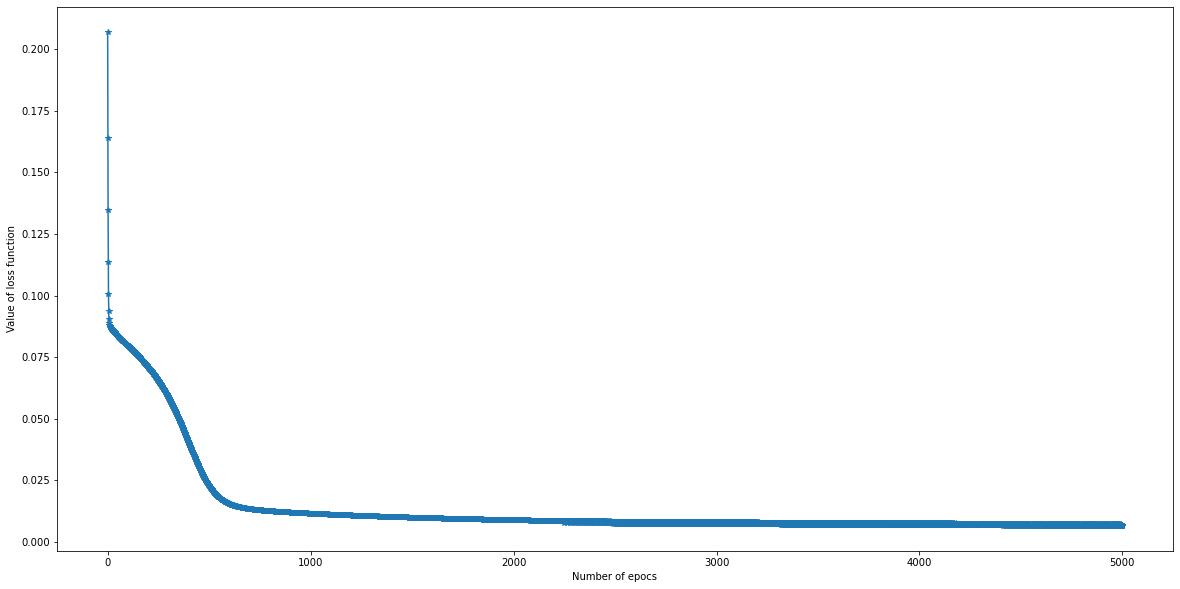

In [3]:
model = NeuralNetwork()
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.INPUT))   # 0
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.OUTPUT))  # 2

input_data = np.array([
    [8.5, 0.65, 1.2],
    [9.5,  0.8, 1.3],
    [9.9,  0.8, 0.5],
    [9.0,  0.9, 1.0]
])

expected_output = np.array([
    [0.1, 1., 0.1],
     [0., 1., 0. ],
    [ 0., 0., 0.1],
    [0.1, 1., 0.2]
])

weight_1 = np.array([
    [ 0.1, 0.2, -0.1],
    [-0.1, 0.1,  0.9],
    [ 0.1, 0.4,  0.1]
])

weight_2 = np.array([
    [0.3, 1.1, -0.3],
    [0.1, 0.2, 0.0],
    [0.0, 1.3, 0.1]
])

model.add_weights(1, weights=weight_1)
model.add_weights(2, weights=weight_2)
model.compile(loss=MeanSquaredError(), metrics=[])
model.input = input_data
model.fit(x=input_data, y=expected_output, epochs=5000, learning_rate=0.01, debug=False)
statistics = model.statistics
history_error_for_epocs = statistics.error_for_epocs
plt.figure(figsize=(20,10))
plt.plot(history_error_for_epocs, '-*')
plt.xlabel('Number of epocs')
plt.ylabel('Value of loss function')
plt.show()

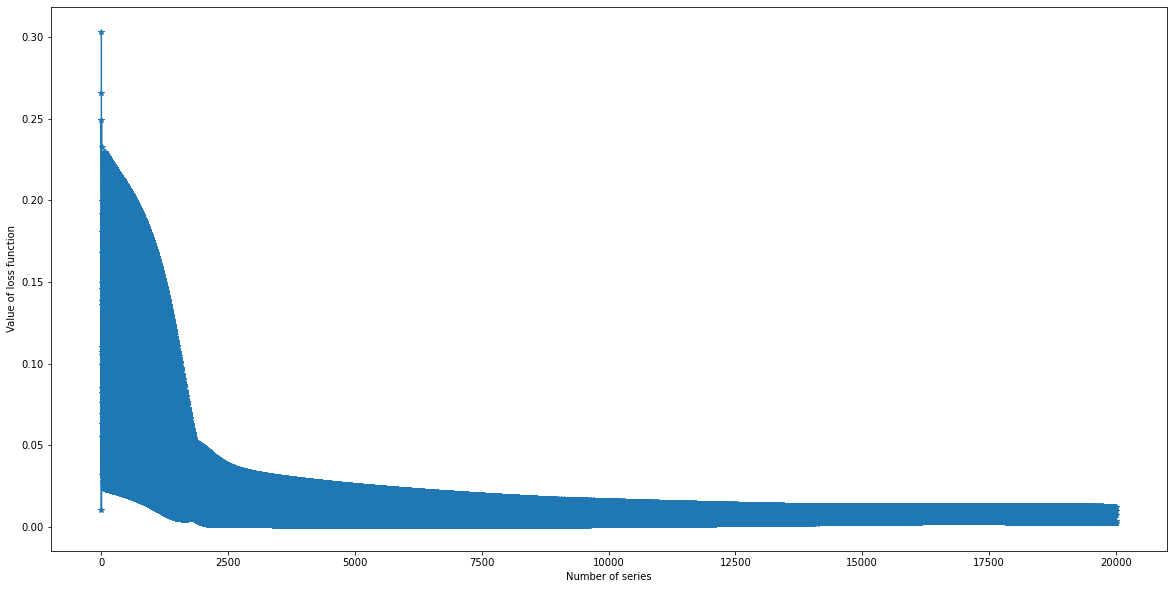

In [4]:
history_error_for_series = statistics.error_for_series
plt.figure(figsize=(20,10))
plt.plot(history_error_for_series, '-*')
plt.xlabel('Number of series')
plt.ylabel('Value of loss function')
plt.show()

<h2>Laboratorium 3 Zadanie 3</h2>
<h3>
    <p>Zmodyfikuj sieć z zadania 3 laboratorium 2 tak, aby składała się z 3 neuronów w warstwie wejścio-wej i 4 w warstwie wyjściowej. Celem sieci jest nauczenie się rozpoznawania kolorów (czerwony (1),zielony (2), niebieski (3), żółty (4)) na podstawie 3 wartości składowych koloru (RGB). Poszczególneneurony w warstwie wyjściowej oznaczają odpowiedź sieci dla danego koloru, przyjmij, że ostatecz-nym kolorem, jaki sieć zwróciła jest neuron z najwyższą wartością. W procesie uczenia przyjmij, żeoczekiwane wartości na wyjściu to 0 dla neuronów nieodpowiadających danemu kolorowi oraz 1 nawyjściu odpowiadającemu kolorowi.</p>
        <br><p>Na przykład wejście[0.91    0.82    0.05]odpowiada kolorowi o ID 4 (żółty). Więc wektor oczeki-wanej odpowiedzi sieci dla takich danych wejściowych powinien wyglądać następująco[0    0    0    1].</p><br>
<ul>
    <li>Zbiór treningowy - zbiór, na którym następuje proces uczenia sieci, dostępny jest pod linkiem:http://pduch.iis.p.lodz.pl/PSI/training_colors.txt.
    <li>Zbiór testowy - zbiór, dla którego sprawdzana jest poprawność działania sieci, dostępny jestpod linkiem:http://pduch.iis.p.lodz.pl/PSI/test_colors.txt.
</ul>
    <p>W pierwszym etapie program uczy sieć neuronową na przykładzie zbioru treningowego (zwróćuwagę, że może być konieczność przeprowadzenia kilku / kilkudziesięciu iteracji). Po zakończeniuprocesu uczenia sprawdzana jest skuteczność sieci na podstawie zbioru testowego.Porównaj wyniki otrzymywane dla tej sieci z wynikami otrzymanymi w zadaniu 4 z laboratorium2. Która sieć potrzebuje więcej czasu, żeby nauczyć się rozpoznawania kolorów?</p></h3>

<h2>Wczytanie zestawu danych treningowych i testowych z plików</h2>

In [5]:
import os
training_file = "training_colors.txt"
test_file = "test_colors.txt"
global_path_to_training_file = os.path.abspath(training_file)
global_path_to_test_file = os.path.abspath(test_file)

def extract_set_data(path_to_file: str):	
    f = open(path_to_file, "r")
    text = f.read()
    lines = text.split('\n')
    list_data = []
    for line in lines:
        list_data.append(np.array(line.split(' '), dtype=float))
    f.close()
    return np.asarray(list_data)

def prepare_expected_value(y,xy):
    tmp_array = np.zeros(xy.shape)
    index = 0
    for yt in y:
        index_color = int(yt[0] - 1)
        tmp_array[index, index_color] = 1
        index += 1
    return tmp_array
    
training_set = extract_set_data(global_path_to_training_file)
training_set_x = training_set[:,:3]
training_set_y = training_set[:,3:4]
training_expected_value = prepare_expected_value(training_set_y, training_set)

test_set = extract_set_data(global_path_to_test_file)
test_set_x = test_set[:,:3]
test_set_y = test_set[:,3:4]
test_expected_value = prepare_expected_value(test_set_y, test_set)

<h2>Oględziny wizualne zbioru treningowego - XY</h2>

In [6]:
print(training_set[:5])

[[0.91 0.82 0.05 4.  ]
 [0.91 0.09 0.26 1.  ]
 [0.89 0.9  0.18 4.  ]
 [0.82 0.04 0.08 1.  ]
 [0.19 0.91 0.   2.  ]]


<h2>Oględziny wizualne zbioru treningowego - Y</h2>

In [7]:
print(training_expected_value[:5])

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


<h2>Utworzenie modelu sieci</h2>

In [23]:
model = NeuralNetwork()
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.INPUT))   # 0
model.add_layer(Layer(units=3, activation=ReLU(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Layer(units=4, activation=ReLU(), type=TypeOfLayer.OUTPUT))  # 2

weight_1 = np.array([
    [ 0.1, 0.2, -0.1],
    [-0.1, 0.1,  0.9],
    [ 0.1, 0.4,  0.1]
])

weight_2 = np.array([
    [0.3, 1.1, -0.3],
    [0.1, 0.2, 0.0],
    [0.0, 1.3, 0.1],
    [0.1, 0.2, 0.3]
])

model.add_weights(1, weights=weight_1)
model.add_weights(2, weights=weight_2)

model.compile(loss=MeanSquaredError(), metrics=[CustomAccuracy()])


<h2>Trenowanie sieci</h2>

In [24]:
model.fit(x=training_set_x, y=training_expected_value, epochs=10000, learning_rate=0.01, debug=False)
statistics: NeuralStatistics = model.statistics

<h2>Wykres zmiann wartości funckji celu od numeru epoki</h2>

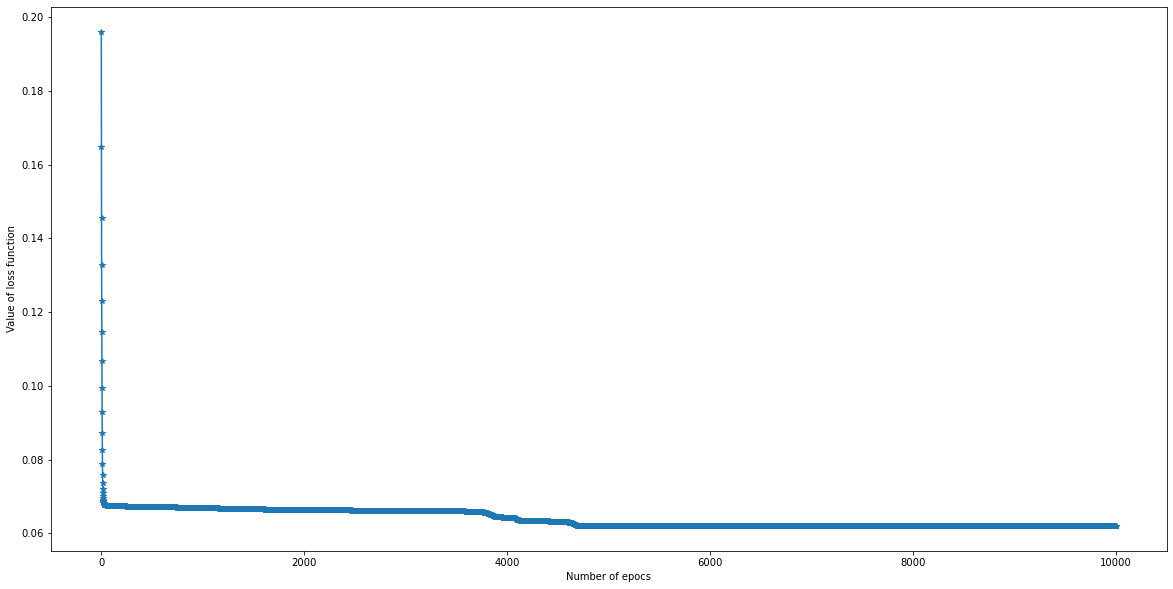

In [25]:
history_error = statistics.error_for_epocs
plt.figure(figsize=(20, 10))
plt.plot(history_error, '-*')
plt.xlabel('Number of epocs')
plt.ylabel('Value of loss function')
plt.show()


<h2>Wykres zmiany accuracy od numeru epoki</h2>

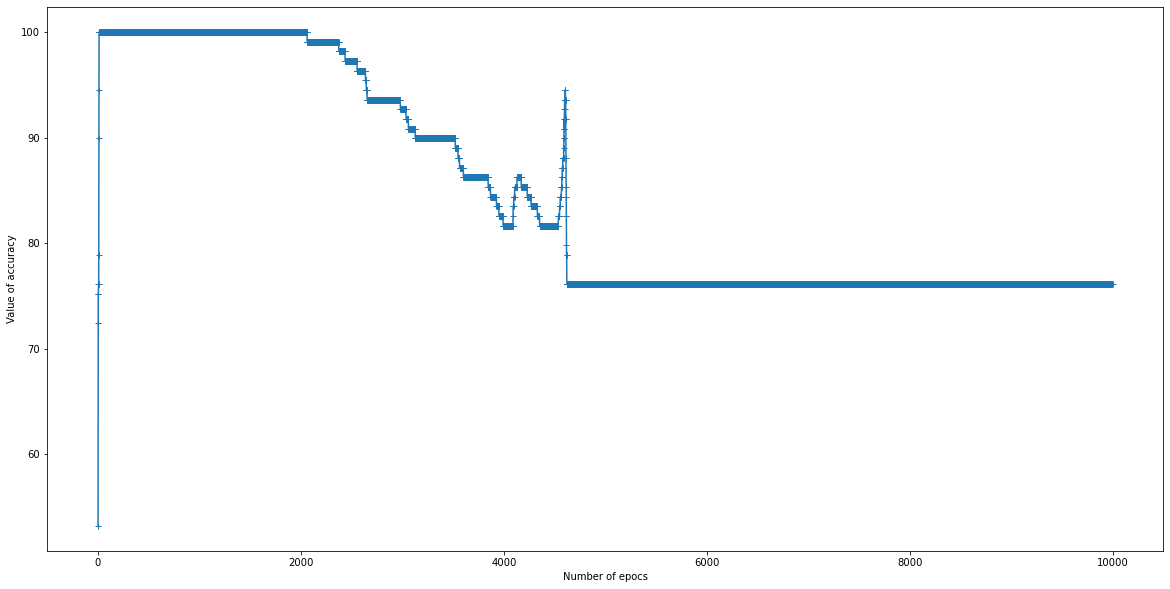

In [26]:
history_accuracy = statistics.history_metrics['accuracy']
plt.figure(figsize=(20, 10))
plt.plot(history_accuracy, '-+')
plt.xlabel('Number of epocs')
plt.ylabel('Value of accuracy')
plt.show()

<h2>Wykres zmiany błędy skorelowanego od numeru epoki</h2>

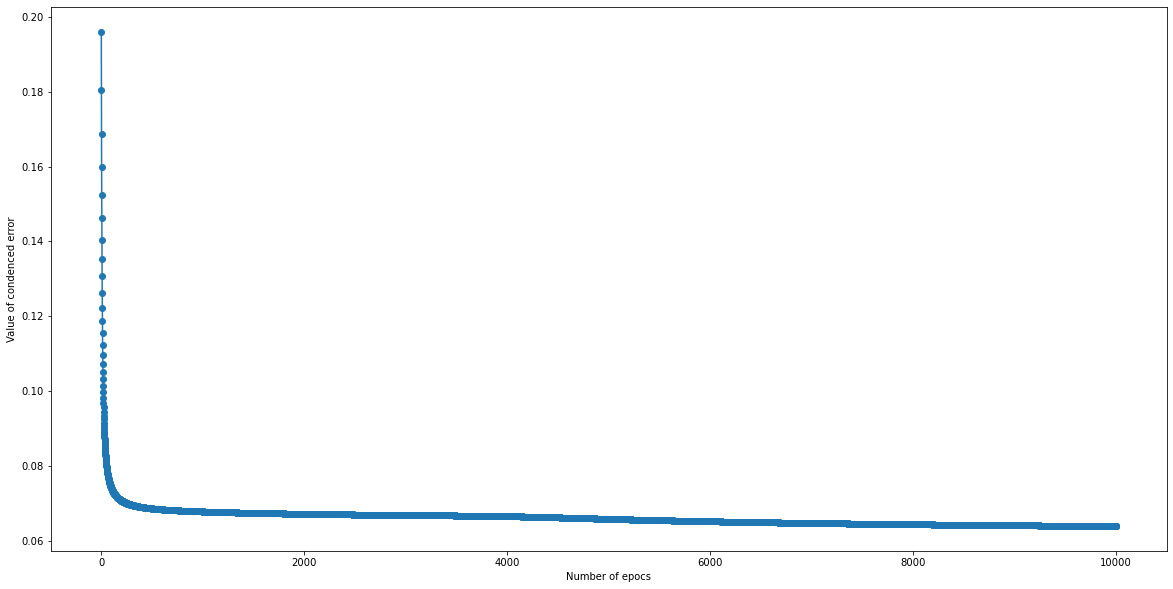

In [27]:
condensed_error = statistics.condensed_error
plt.figure(figsize=(20, 10))
plt.plot(condensed_error, '-o')
plt.xlabel('Number of epocs')
plt.ylabel('Value of condenced error')
plt.show()

<h2>Wykres zmiany wartości funkcji celu od numeru seri</h2>

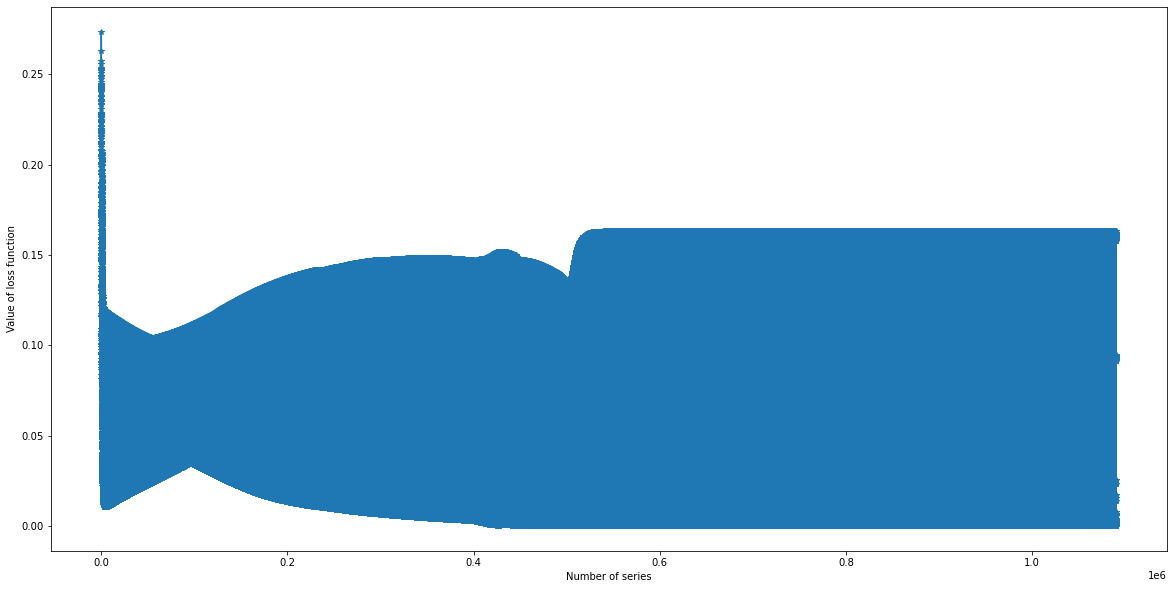

In [28]:
history_error = statistics.error_for_epocs
history_error_for_series = statistics.error_for_series
plt.figure(figsize=(20,10))
plt.plot(history_error_for_series, '-*')
plt.xlabel('Number of series')
plt.ylabel('Value of loss function')
plt.show()

<h2>Testowanie sieci</h2>

In [22]:
model.valid(x_test=test_set_x, y_test=test_expected_value, debug=False)
predict = model.predict


def prepare_predict(predict):
    predict_color_array = np.zeros(predict.shape[0])
    index = 0
    for rekord in predict:
        max_from_rekord = max(rekord)
        for index_with_max in range(predict.shape[1]):
            if predict[index, index_with_max] == max_from_rekord:
                predict_color_array[index] = index_with_max
                index += 1
                break
    return predict_color_array


predicted_values = prepare_predict(predict)
print('Predicted value')
print(predicted_values)
print('Test value')
test_values = test_set_y.flatten()
print(test_values)
mse = Accuracy()
accuracy = mse.count_value(test_values, predicted_values)
print('accuracy:', accuracy, ' %')

Predicted value
[2. 2. 2. 2. 3. 2. 3. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.
 2. 2. 2. 2. 3. 3. 2. 2. 3. 2. 3. 2. 3. 2. 3. 2. 3. 3. 2. 2. 2. 3. 3. 2.
 2. 2. 2. 2. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 2. 3. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2.
 2. 2. 3. 2. 2. 2. 2. 2. 3. 2.]
Test value
[4. 2. 3. 2. 1. 3. 1. 3. 4. 3. 3. 3. 4. 3. 1. 4. 3. 3. 1. 4. 2. 3. 4. 1.
 1. 4. 3. 3. 4. 1. 4. 3. 1. 2. 4. 1. 4. 3. 1. 4. 4. 4. 3. 2. 1. 4. 4. 1.
 2. 2. 4. 2. 2. 2. 3. 1. 1. 1. 2. 2. 2. 4. 4. 2. 4. 4. 1. 1. 2. 1. 1. 4.
 2. 3. 4. 4. 3. 3. 4. 3. 2. 4. 3. 1. 4. 1. 2. 4. 3. 3. 1. 2. 3. 1. 2. 2.
 2. 4. 2. 3. 1. 3. 2. 1. 3. 2. 1. 1. 3. 3. 4. 3. 2. 1. 2. 3. 4. 3. 3. 1.
 4. 2. 1. 1. 3. 1. 3. 1. 1. 4.]
accuracy: 18.461538461538463  %


<h2>Laboratorium 3 Zadanie 4</h2>
<h3>Zmodyfikuj  sieć  z  zadania  5  laboratorium  1  tak,  aby  przyjmowała  jeszcze  funkcję  aktywacji  dlakażdej z warstw (pamiętaj, że nie zawsze każda warstwa będzie musiała ją posiadać). Klasa powinnaudostępniać następujące funkcje:</h3>
<h3>
<ul>
    <li>add_layer(n, [weightminvalue, weightmaxvalue, activationfunction]) -<br>  funkcja dodaje warstwę n neuronów do sieci, opcjonalnie może przyjmować zakres wartości, z którego będą  losowane  wagi  oraz  informację  o  wybranej  funkcji  aktywacji  (w  postaci  wskaźnika  nafunkcję, stringa lub w inny sposób),
    <li>fit(input, expectedoutput) -<br>
        funkcja aktualizuje wagi sieci na podstawie przekazanych doniej danych wejściowych (input) oraz oczekiwanej dla nich odpowiedzi sieci (expected output).
    </ul>
</h3>
<h3>
Zbuduj sieć składającą się z trzech warstw:<br>
    <ul>
        <li>warstwa wejściowa - 784 neurony,
            <li>warstwa ukryta - 40 neuronów,
                <li>warstwa wyjściowa - 10 neuronów.
    </ul>
    Przetestuj działania tej sieci na bazie danych MNIST1. <br>
    Sieć powinna się uczyć, bazując na częścitreningowej (pliki zaczynające się od train), a testować na części testowej (pliki zaczynające się odt10k).<br>
</h3>

<h3>Import bazy MNIST</h3>

X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000, 10)


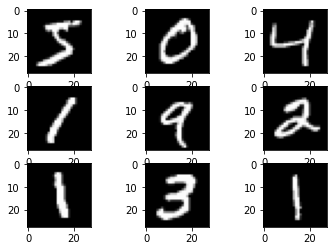

In [55]:
from keras.datasets import mnist
from matplotlib import pyplot
import keras
import keras.utils
from keras import utils as np_utils
from tensorflow.keras import utils as np_utils
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = keras.utils.to_categorical(trainY)
	testY = keras.utils.to_categorical(testY)
	return trainX, trainY, testX, testY


train_X, train_Y, test_X, test_Y = load_dataset()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_Y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_Y.shape))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range 0-1
train_norm_X = train_norm / 255.0
test_norm_X = test_norm / 255.0

<h3>Przygotowanie modelu sieci</h3>

In [56]:
from activations.SoftMax import SoftMax
from metrics.Accuracy import Accuracy
from metrics.CustomAccuracy import CustomAccuracy
model = NeuralNetwork()
model.add_layer(Layer(units=784, type=TypeOfLayer.INPUT))  # 0
model.add_layer(Layer(units=40, activation=ReLU(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Layer(units=10, activation=SoftMax(), type=TypeOfLayer.OUTPUT))  # 2

model.compile(loss=MeanSquaredError(), metrics=[CustomAccuracy()])


<h3>Przygotowanie danych</h3>

In [66]:
train_X = train_X.reshape((train_norm_X.shape[0], 28*28))
test_X = test_X.reshape((test_norm_X.shape[0], 28*28))
print('train_X.shape: ',train_X.shape)
print('test_X.shape: ',test_X.shape)

train_X.shape:  (60000, 784)
test_X.shape:  (10000, 784)


<h3>Trenowanie modelu</h3>

In [67]:
model.fit(x=train_X, y=train_Y, epochs=10000, learning_rate=0.00000000001)

<h2>Wykres zmiann wartości funckji celu od numeru epoki</h2>

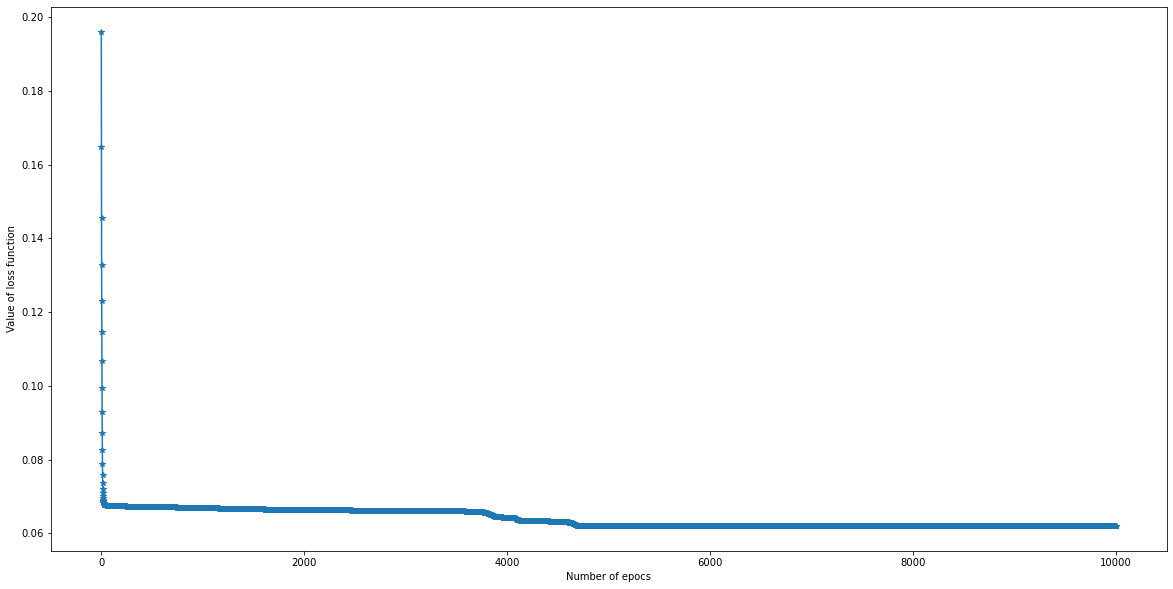

In [68]:
history_error = statistics.error_for_epocs
plt.figure(figsize=(20, 10))
plt.plot(history_error, '-*')
plt.xlabel('Number of epocs')
plt.ylabel('Value of loss function')
plt.show()


<h2>Wykres zmiany błędy skorelowanego od numeru epoki</h2>

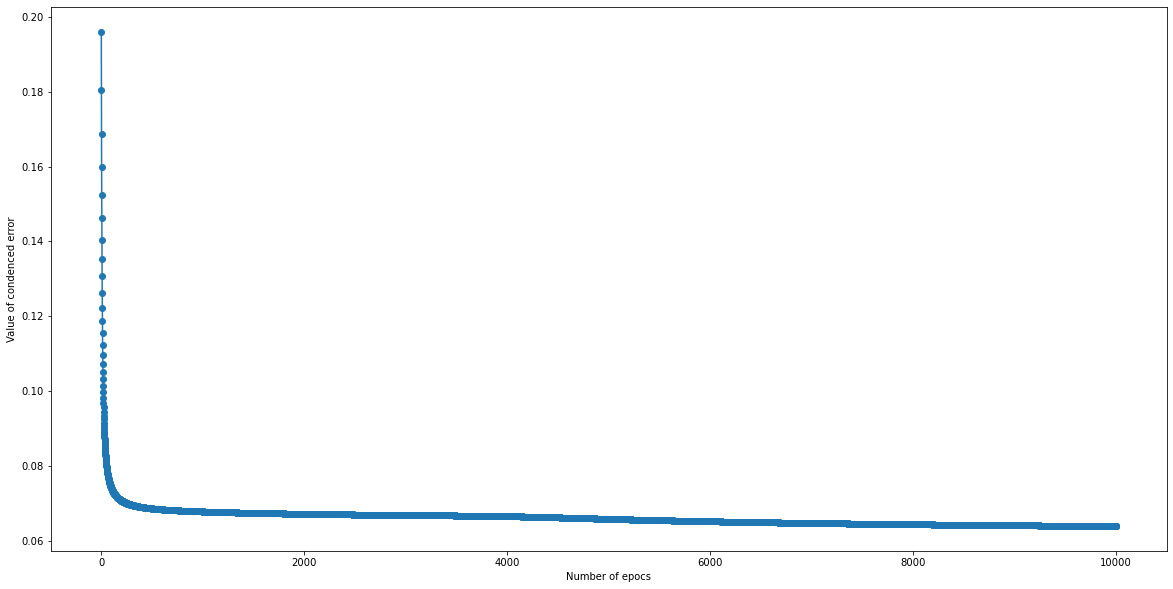

In [69]:
condensed_error = statistics.condensed_error
plt.figure(figsize=(20, 10))
plt.plot(condensed_error, '-o')
plt.xlabel('Number of epocs')
plt.ylabel('Value of condenced error')
plt.show()

<h2>Wykres zmiany wartości funkcji celu od numeru seri</h2>

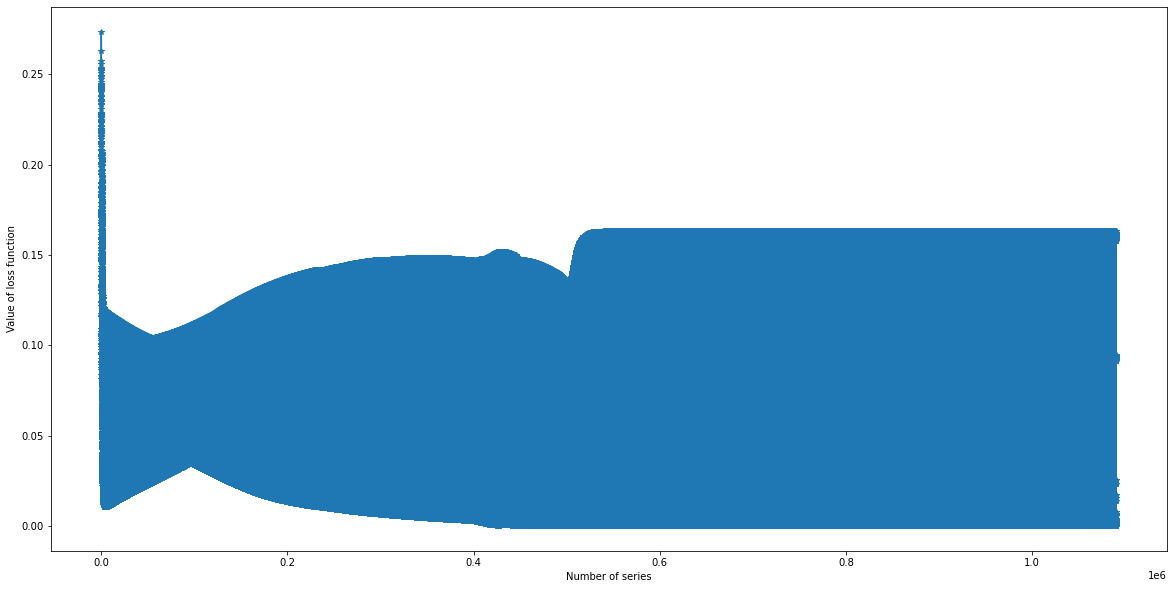

In [70]:
history_error = statistics.error_for_epocs
history_error_for_series = statistics.error_for_series
plt.figure(figsize=(20,10))
plt.plot(history_error_for_series, '-*')
plt.xlabel('Number of series')
plt.ylabel('Value of loss function')
plt.show()

In [71]:
model.valid(x_test=test_X, y_test=test_Y, debug=False)
predict = model.predict


predicted_values = predict
print('Predicted value')
print(predicted_values)
print('Test value')
test_values = test_Y
print(test_values)
mse = CustomAccuracy()
accuracy = mse.count_value(test_values, predicted_values)
print('accuracy:', accuracy, ' %')

Predicted value
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test value
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
accuracy: 9.8  %
